We will be using covid_19_india.csv covering data till April month for our visualization. So lets us load the data and take a glimpse at the information available

- Sno = Serial Number
- Date = Date of recording the Covid 19 count (format DD/MM/YY)
- Time = Time of recording the Covid 19 count
- State/UnionTerritory = Contains the full name of the State or the Union Territory
- ConfirmedIndianNational = Confirmed Indian National having Covid 19 as of this date in a given State or Union Territory
- ConfirmedForeignNational = Confirmed Foreign National having Covid 19 as of this date in a given State or Union Territory
- Cured = Count of Patient recovered or cured as of this date in a given State or Union Territory
- Deaths = Count of patient who have died as of this date in a given State or Union Territory
- Confirmed = Count of Total Patient having Covid 19 as of this date in a given State or Union Territory

In [4]:
!pip install matplotlib

In [5]:
# we will be using only the following columns 
# Date ,State/Union Territory & Confirmed Count

use_columns = ['Date' , 'State/UnionTerritory', 'Confirmed']

#importing data
import pandas as pd
df = pd.read_csv('covid_19_india.csv' , usecols = use_columns)

# Let us convert the date from String into YYYY-MM-DD format using pandas to_datetime function
df['Date'] =pd.to_datetime(df['Date'] , format='%d/%m/%y')

In [6]:
df

Date              State/UnionTerritory  Confirmed
0    2020-01-30                            Kerala          1
1    2020-01-31                            Kerala          1
2    2020-02-01                            Kerala          2
3    2020-02-02                            Kerala          3
4    2020-02-03                            Kerala          3
...         ...                               ...        ...
2769 2020-06-07                           Tripura        747
2770 2020-06-07                       Uttarakhand       1303
2771 2020-06-07                     Uttar Pradesh       9733
2772 2020-06-07                       West Bengal       7738
2773 2020-06-07  Cases being reassigned to states       8605

[2774 rows x 3 columns]

Taking the last date in the dataset as current date and plotting bar graph for the same.

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

current_date = '2020-06-07'
df_final = (df[df['Date']==current_date]
       .sort_values(by='Confirmed', ascending=False)
       .head(10))
print(df_final)

           Date              State/UnionTerritory  Confirmed
2757 2020-06-07                       Maharashtra      82968
2767 2020-06-07                        Tamil Nadu      30152
2746 2020-06-07                             Delhi      27654
2748 2020-06-07                           Gujarat      19592
2765 2020-06-07                         Rajasthan      10331
2771 2020-06-07                     Uttar Pradesh       9733
2756 2020-06-07                    Madhya Pradesh       9228
2773 2020-06-07  Cases being reassigned to states       8605
2772 2020-06-07                       West Bengal       7738
2753 2020-06-07                         Karnataka       5213


<BarContainer object of 10 artists>

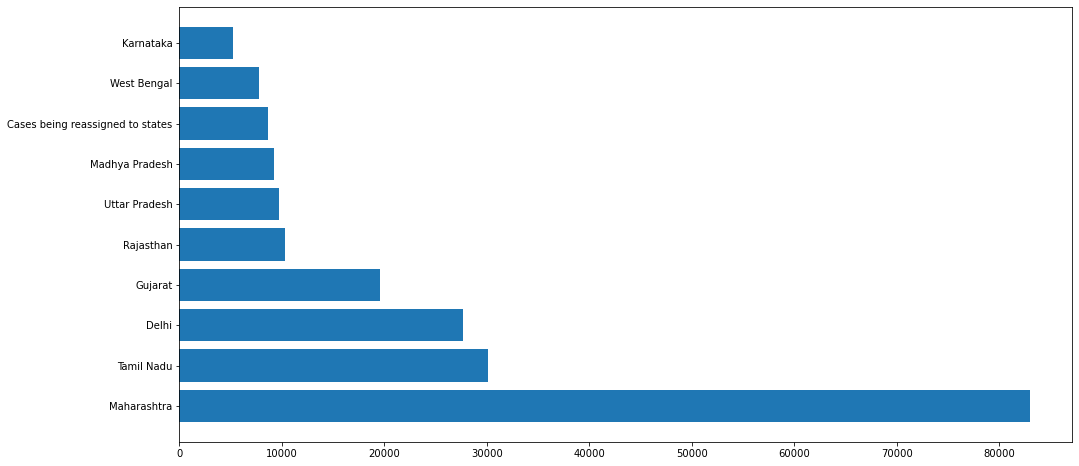

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.barh(df_final['State/UnionTerritory'], df_final['Confirmed'])

Reversing the order of the bar garph

Text(1, 0.4, '2020-06-07')

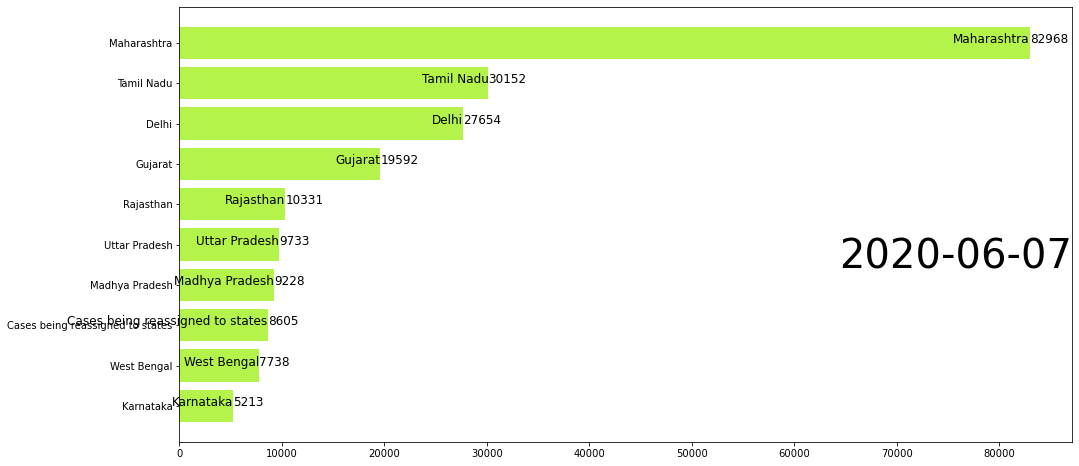

In [11]:
fig, ax = plt.subplots(figsize=(16, 8))
df_final= df_final[::-1]   # States with highest count will be pushed down - so that it shows up in the graph

ax.barh(df_final['State/UnionTerritory'], df_final['Confirmed'] , color ='#B3F34A')

for i, (count, region) in enumerate(zip(df_final['Confirmed'], df_final['State/UnionTerritory'])):
    ax.text(count, i,     region,      size=12,      ha='right' )  # Maharashtra
    ax.text(count, i,     count,       size=12  ,  ha='left')   # 9915

ax.text(1, 0.4, current_date, transform=ax.transAxes, size=40, ha='right') # add the date 

Function for plotting the bar graph

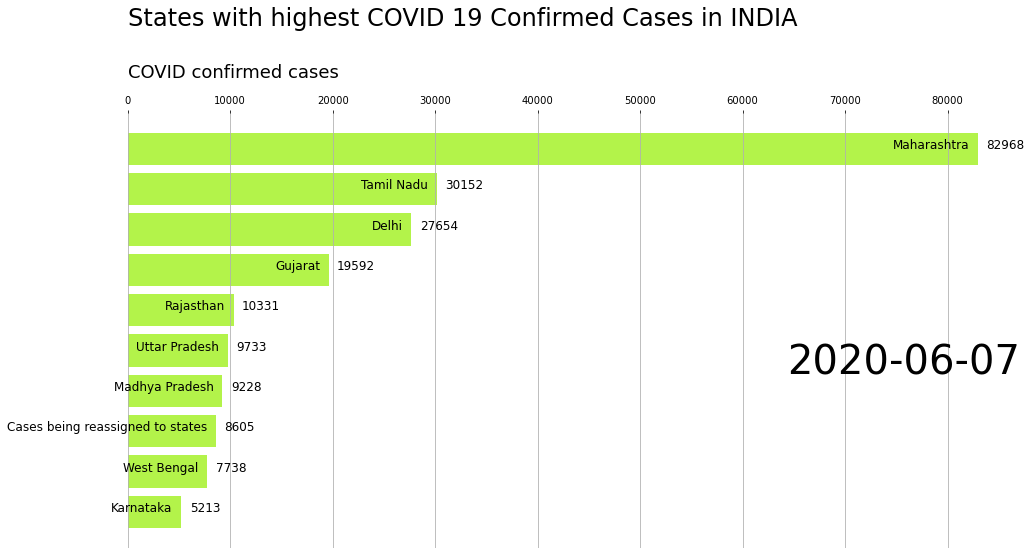

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))
def draw_horizontal_bar (date):
    ax.clear()  # this is important - as each function execution should run on fresh axis 
    df_final = (df[df['Date']==date].sort_values(by='Confirmed', ascending=False).head(10))
    df_final= df_final[::-1] # flip the values
    ax.barh(df_final['State/UnionTerritory'], df_final['Confirmed'] , color ='#B3F34A')
    filler = df_final['Confirmed'].max() /100 #  to add space between the States/UnionTerritory Name and the count
    
    for i, (count, region) in enumerate(zip(df_final['Confirmed'], df_final['State/UnionTerritory'])):
        ax.text(count -filler, i,     region,      size=12,  weight =400,    ha='right' )  # Maharashtra
        ax.text(count +filler , i,     count,       size=12  ,  ha='left')   # 9915

    ax.text(1, 0.4, date, transform=ax.transAxes, size=40, ha='right') # add the date 
    ax.text(0, 1.08, 'COVID confirmed cases', transform=ax.transAxes, size=18, color='black')
    ax.xaxis.set_ticks_position('top')
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_yticks([])
    ax.text(0, 1.20, 'States with highest COVID 19 Confirmed Cases in INDIA',
            transform=ax.transAxes, size=24,  ha='left')
    plt.box(False) # remove the box 
    

draw_horizontal_bar('2020-06-07')

Animated Bar plot

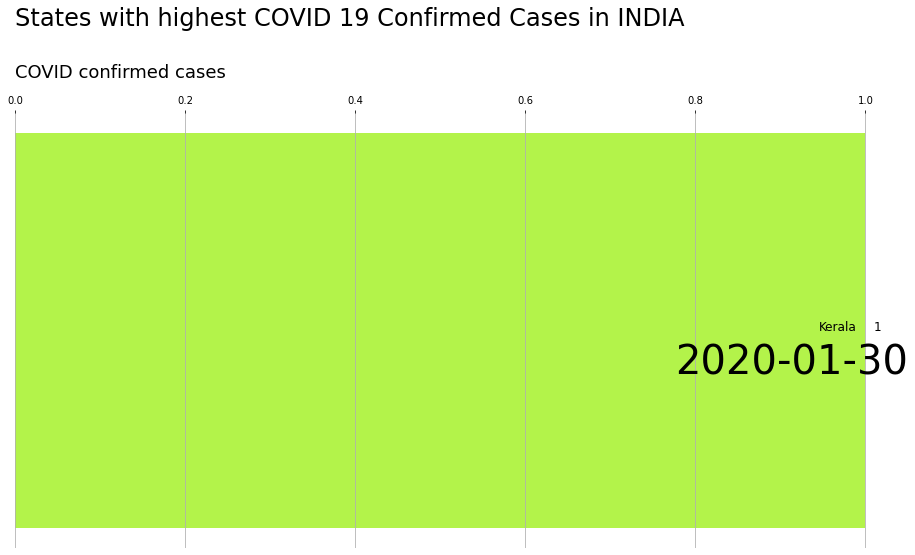

In [14]:
# Lets us get all the dates 

all_dates = df[df['Date'] >= '2020-01-30']['Date'].astype(str).to_list() # this is contain duplicates
dates = list(set(all_dates)) # we get uniques dates - but they are not sorted
dates = sorted(dates) # all dates arranged in order 

import matplotlib.animation as animation # import animation 
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(16, 8))
anim = animation.FuncAnimation(fig, draw_horizontal_bar, frames=dates) # this will call our 
# function for all the dates one by one
HTML(anim.to_jshtml()) 

Saving the image

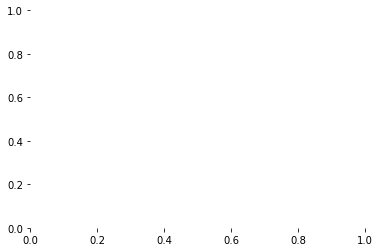

In [19]:
f = r"covid_india_confirmed.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

<img src="covid_india.gif" width="750" align="center">